In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
import pandas as pd
crypto_news = pd.read_csv('drive/MyDrive/NLP/lab_one/cryptonews.csv')
print(crypto_news['sentiment'][0])
print(crypto_news['subject'][0])
alt_data = crypto_news.loc[crypto_news['subject'] == 'altcoin']
alt_data.reset_index(inplace=True)

{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.6}
altcoin


In [6]:
alt_data.head()

,index,date,sentiment,source,subject,text,title,url
0,0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,10,2023-12-18 23:48:19,"{'class': 'positive', 'polarity': 0.01, 'subje...",CoinTelegraph,altcoin,"The new CEO, Josh Swihart, has been the vice p...",Zcash founder Zooko Wilcox steps down from Ele...,https://cointelegraph.com/news/zcash-founder-z...
2,13,2023-12-18 22:48:00,"{'class': 'positive', 'polarity': 0.6, 'subjec...",CryptoPotato,altcoin,Tether asserts to have effectively immobilized...,Tether Reveals Partnerships with Secret Servic...,https://cryptopotato.com/tether-reveals-partne...
3,14,2023-12-18 21:47:07,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,altcoin,Here is our weekly collection of digital asset...,Crypto Exchange Listing and Delisting Announce...,https://cryptonews.comhttps://cryptonews.com/n...
4,16,2023-12-18 20:56:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,altcoin,BEEG's adoption skyrockets as 37% is minted wi...,Avalanche Network Gas Fees Surge Linked to Tra...,https://cryptopotato.com/avalanche-network-gas...


Датасет, помимо необходимой информации (sentiment class, text, title), содержит информацию об источнике, типе криптовалюты и url. Sentiment содержит дополнительные значения polarity, subjectivity. Все перечисленное не понадобится, при обучении будут использованы новости, касающиеся altcoin

In [124]:
def preprocess_target(x):

	return str.lstrip(x[10:].split(', ')[0])

relevant_data = alt_data[['sentiment', 'text', 'title']]
relevant_data['sentiment'] = relevant_data['sentiment'].apply(preprocess_target)

relevant_data_crude = relevant_data.copy()

In [9]:
relevant_data.head()

,sentiment,text,title
0,'negative',Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...
1,'positive',"The new CEO, Josh Swihart, has been the vice p...",Zcash founder Zooko Wilcox steps down from Ele...
2,'positive',Tether asserts to have effectively immobilized...,Tether Reveals Partnerships with Secret Servic...
3,'neutral',Here is our weekly collection of digital asset...,Crypto Exchange Listing and Delisting Announce...
4,'neutral',BEEG's adoption skyrockets as 37% is minted wi...,Avalanche Network Gas Fees Surge Linked to Tra...


<Axes: xlabel='sentiment', ylabel='count'>

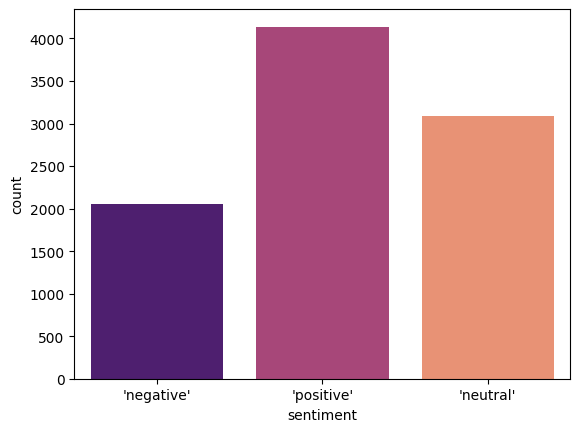

In [10]:
import seaborn as sns

sns.countplot(relevant_data, x="sentiment", palette="magma")

По графику видно, что классы несбалансированны: позитивных новостей примерно в два раза больше, чем негативных

In [125]:
def words_stat(sent):

  for word in sent.split():
    words[word] = words.get(word, 0) + 1

words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)
print('Топ слов:')
print(sorted_words[:50])

Топ слов:
['the', 'to', 'of', 'a', 'and', 'in', 'has', 'The', 'is', 'crypto', 'for', 'its', 'on', 'that', 'as', 'with', 'by', 'price', 'are', 'market', 'will', 'have', 'from', 'be', 'cryptocurrency', 'it', 'digital', 'new', 'an', 'past', 'at', 'over', 'after', 'this', 'could', 'been', 'Bitcoin', 'trading', 'their', 'more', 'million', 'but', 'investors', 'US', '24', 'exchange', 'recent', 'token', 'up', 'some']


Рассмотрим наиболее часто встречающиеся слова. В топе находится много предлогов, их вместе с другими стоп-словами необходимо удалить.

In [126]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stop_words(sent):

  relevant_words = [x.lower() for x in sent.split() if x.lower() not in stop]
  return " ".join(relevant_words)

relevant_data['text'] = relevant_data['text'].apply(remove_stop_words)
relevant_data['title'] = relevant_data['title'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)
print('Топ слов после обработки:')
print(sorted_words[:50])

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 50: break
  if not word.isalpha(): non_alphas.append(word)

print('Топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Топ слов после обработки:
['crypto', 'price', 'market', 'cryptocurrency', 'digital', 'new', 'past', 'could', 'bitcoin', 'trading', 'exchange', 'million', 'investors', 'us', '24', 'token', 'recent', 'coin', 'ftx', 'binance', 'last', 'asset', 'meme', 'bank', 'get', 'xrp', 'one', 'said', 'hours,', 'may', 'financial', 'assets', 'digest', 'news.', 'daily,', 'bite-sized', 'blockchain-related', 'usd', 'ethereum', 'cryptoasset', 'following', 'despite', 'sec', 'latest', 'users', 'buy', 'ceo', 'cryptocurrencies', 'terra', '-']
Топ слов, содержащих что-то помимо букв:
['24', 'hours,', 'news.', 'daily,', 'bite-sized', 'blockchain-related', '-', 'market.', '\\x93', 'u.s.', 'delisting,', 'pair-related', 'market,', 'web3', 'week.', 'however,', 'today,', "bitcoin's", 'year.', "world's", 'today.', 'week,', '$1', 'co-founder', 'assets.', 'bankman-fried', 'industry.', 'cryptocurrency,', '(btc)', '–', "here's", 'hours.', 'days.', 'million.', 'something?', 'today.have', 'investors.', 'and/or...', '2023.', 

Новый топ содержит много слов со знаками препинания. Удалим их с конца слов

In [128]:
def remove_symbols(sent):
  """
  Удаление ненужных знаков с конца слов
  """

  sent_words = sent.split()
  new_words = [word[:-1] if word[-1] in ['.', ',', ':', ';', '!', '?', '$'] else word for word in sent_words]

  return " ".join(new_words)

relevant_data['text'] = relevant_data['text'].apply(remove_symbols)
relevant_data['title'] = relevant_data['title'].apply(remove_symbols)

In [129]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 50: break
  if not word.isalpha(): non_alphas.append(word)

print('Новый топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Новый топ слов, содержащих что-то помимо букв:
['24', 'bite-sized', 'blockchain-related', '-', '2023', '2022', '\\x93', 'u.s', 'web3', 'pair-related', "bitcoin's", '$1', 'bankman-fried', '(btc)', "world's", 'co-founder', '–', "here's", '2021', 'today.have', 'and/or..', '(eth)', "ripple's", '(shib)', '(lunc)', '5%', '30%', '1%', 'on-chain', '10%', "sec's", '2%', "company's", "ftx's", '3%', '(cbdc)', '1.5%', "nation's", '20%', 'all-time', '1', '50%', '0.5%', '2', "binance's", 'world’s', '(sec)', '4%', 'long-term', 'near-term', '30']


Наконец, стоит удалить числа вроде 2022, 24 и провести лемматизацию

In [130]:
import nltk
nltk.download('wordnet')

import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
pattern = re.compile("\$?\d+%?")

def lemm_no_num(sent):
  """
  Лемматизация и удаление чисел
  """
  sent_words = sent.split()
  new_words = [lemmatizer.lemmatize(word) for word in sent_words if not pattern.match(word)]

  return " ".join(new_words)

relevant_data['text'] = relevant_data['text'].apply(lemm_no_num)
relevant_data['title'] = relevant_data['title'].apply(lemm_no_num)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [131]:
words = {}
relevant_data['text'].apply(lambda x: words_stat(x))
sorted_words = sorted(words, key=words.get, reverse=True)

non_alphas = []

for word in sorted_words:
  if len(non_alphas) > 50: break
  if not word.isalpha(): non_alphas.append(word)

print('Новый топ слов, содержащих что-то помимо букв:')
print(non_alphas)

Новый топ слов, содержащих что-то помимо букв:
['bite-sized', 'blockchain-related', '-', '\\x93', 'u.s', 'web3', 'pair-related', "bitcoin's", 'bankman-fried', '(btc)', "world's", 'co-founder', '–', "here's", 'today.have', 'and/or..', '(eth)', "ripple's", '(shib)', '(lunc)', 'on-chain', "sec's", "company's", "ftx's", '(cbdc)', "nation's", 'all-time', "binance's", 'world’s', '(sec)', 'long-term', 'near-term', '(doge)', 'short-term', "musk's", '(ada)', 'cross-border', '(sol)', 'blue-chip', "exchange's", 'binance.us', 'now-defunct', 'sec’s', "china's", 'best-performing', "country's", "bankman-fried's", 'ftx’s', "xrp's", "russia's", "cryptocurrency's"]


Проверим результат обработки:

In [132]:
offset = 20
for i in range(5):
  print(relevant_data['title'][offset+i])
  print(relevant_data['text'][offset+i])
  print(relevant_data['sentiment'][offset+i], '\n')

solana saga sell ebay bonk frenzy cause sell-out
month tepid sale solana saga phone “sold out” official website amid recent frenzy free bonk memecoin airdrop
'positive' 

ex-central bank chief say china ‘must lead world’ cbdc adoption
former governor china’s central bank dai xianglong insisted china need “lead world’ cbdc adoption nation’s digital yuan pilot continues
'neutral' 

decentralized exchange bounce back billion traded november
monthly trading volume decentralized exchange (dex) november increased billion bouncing back multiyear low recorded september
'neutral' 

meta apologizes qatari billionaire scam crypto ad facebook report
three year legal battle concludes meta apologizing al mana unauthorized ad causing reputational damage distress
'positive' 

ftx’s revised reorganization plan address cryptocurrency claim valuation
debtor now-defunct cryptocurrency exchange ftx submitted amended chapter plan reorganization suggesting customer asset claim valued retroactively date excha

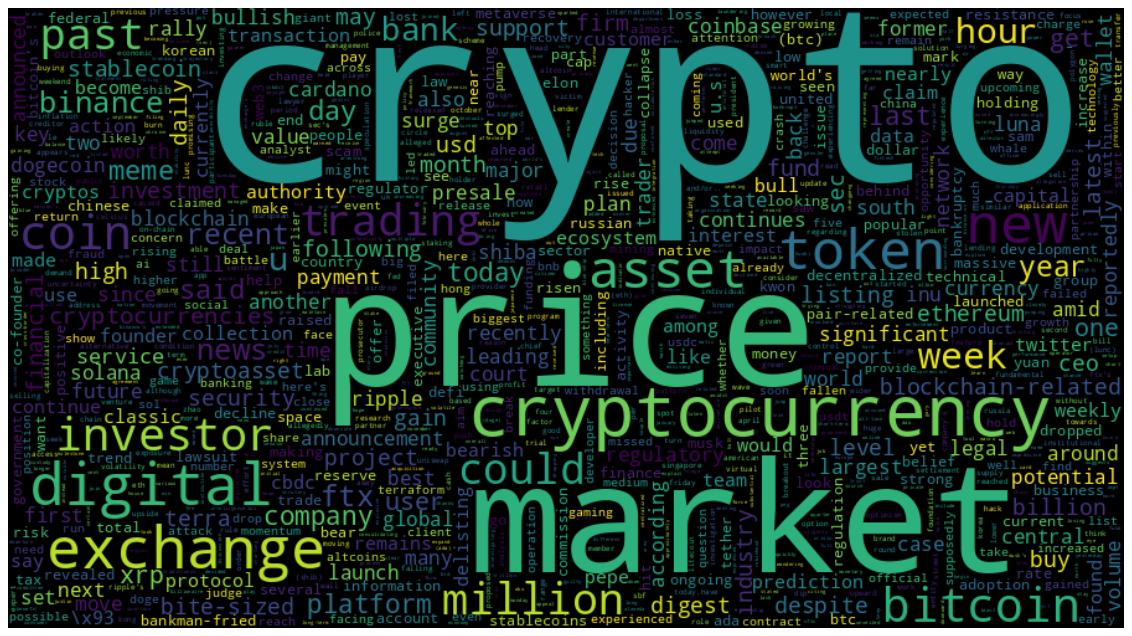

In [133]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=900, height=500, max_words=1628, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(words)

plt.figure(figsize=(18, 16), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

На wordcloud также не видно лишних слов

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

relevant_data['all_text'] = relevant_data['text'] + relevant_data['title']

v = TfidfVectorizer()
X = v.fit_transform(relevant_data['all_text'])

encoder = LabelEncoder()
encoder.fit(relevant_data['sentiment'])
y = encoder.transform(relevant_data['sentiment'])

Для использования в модели заголовок и статья были объединены и векторизированны с помощью tf-idf, target был закодирован с помощью label encoder

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=302)
clf = SVC()
clf.fit(X_train, y_train)

SVC()

F1 score is:  0.5834645513861394


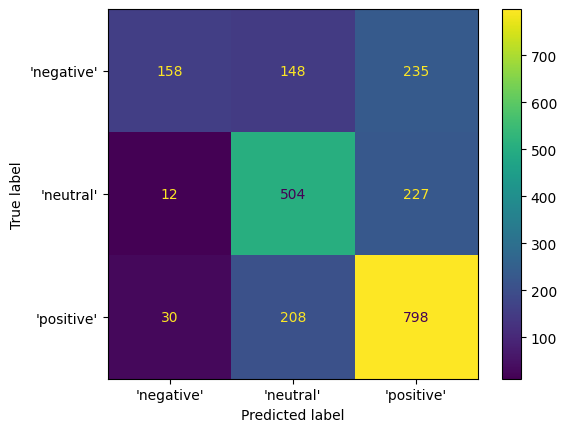

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score is: ', f1)
y_test_old = encoder.inverse_transform(y_test)
y_pred_old = encoder.inverse_transform(y_pred)
ConfusionMatrixDisplay.from_predictions(y_test_old, y_pred_old)

По confusion matrix можно заметить, что хуже всего модель классифицирует 'negative', лучше всего 'positive'. Это может быть вызвано bias модели в пользу более распространенного класса. Попробуем улучшить результат подбором гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.471 total time=  13.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.466 total time=  15.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.470 total time=  12.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.467 total time=  13.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.471 total time=  12.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.446 total time=  12.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.446 total time=  13.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.445 total time=  12.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.446 total time=  11.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.446 total time=  11.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.446 total time=  12.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

Лучший результат был получен при параметрах 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'

F1 score is:  0.6470174697237828


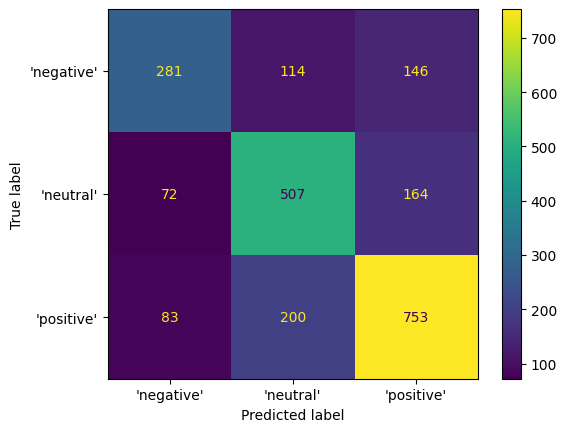

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=302)
clf = SVC(C=10, gamma=0.1, kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score is: ', f1)
y_test_old = encoder.inverse_transform(y_test)
y_pred_old = encoder.inverse_transform(y_pred)
ConfusionMatrixDisplay.from_predictions(y_test_old, y_pred_old)

По графику видно, что точность определения 'positive' и 'neutral' немного упали, зато выросла точность определения 'negative'. При этом модель стала чаще принимать 'positive' и 'neutral' за 'negative'. Можно сказать, что bias модели уменьшился

Для обучения RNN создадим custom dataset, пользуясь предобработанными данными в pandas

In [23]:
max_len=128
batch_size=32

In [40]:
from torch import nn
from torch import from_numpy
from torch.utils.data import Dataset, DataLoader

class CryptoDataset(Dataset):
    def __init__(self, df):

        self.X = df['all_text'].to_list()
        self.y = from_numpy(encoder.transform(df['sentiment']))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

crypto_data = CryptoDataset(relevant_data)

i = 0
for text, label in crypto_data:
  if i > 5: break
  i+=1
  print(text, label)

grayscale ceo michael sonnenshein belief sec need approve spot bitcoin exchange-traded fund (etfs) simultaneouslygrayscale ceo call simultaneous approval spot product level field tensor(0)
new ceo josh swihart vice president electric coin nearly five year recently took four month stint away firmzcash founder zooko wilcox step electric coin naming new ceo tensor(2)
tether asserts effectively immobilized wallet overseeing million usdt cooperation law enforcement agencytether reveals partnership secret service fbi tensor(2)
weekly collection digital asset listing delisting trading pair-related announcement crypto exchange found last week todaycrypto exchange listing delisting announcement december tensor(1)
beeg's adoption skyrocket minted within hour minute attracting holderavalanche network gas fee surge linked trader joe founder’s social experiment tensor(1)
recent miner revenue stemmed transaction fee alone booming thanks ordinalhere’s much miner profiting brc-20 explosion tensor(2)


Создадим словарь, используя генератор токенов. Добавим специальные токены \<pad\> и \<unk\> для паддинга и обозначения незнакомых токенов. Их номера в словаре будут 0 и 1

In [41]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer("basic_english")

def yield_tokens(data_iter):
    for text, label in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(crypto_data), specials=['<pad>', '<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [118]:
vocab.get_itos()[:30]

['<pad>',
 '<unk>',
 'crypto',
 "'",
 'price',
 's',
 '.',
 '(',
 ')',
 'market',
 '\\x93',
 'new',
 'exchange',
 'million',
 'token',
 'coin',
 'prediction',
 'digital',
 'cryptocurrency',
 'report',
 'trading',
 'u',
 'bitcoin',
 'asset',
 'bank',
 'could',
 'investor',
 'ftx',
 'buy',
 'binance']

In [30]:
len(vocab)

23153

Попробуем уменьшить размер словаря, убрав токены, которые встречаются менее двух раз

In [69]:
vocab = build_vocab_from_iterator(yield_tokens(crypto_data), specials=['<pad>', '<unk>'], min_freq=2)
vocab.set_default_index(vocab['<unk>'])
len(vocab)

9171

Словарь уменьшился в 2.5 раза. Далее данные из dataset необходимо разделить на тренировочные и тестовые. Для воспроизводимости воспользуемся генератором

In [88]:
from torch.utils.data import random_split
from torch import Generator

rand_gen = Generator()
rand_gen.manual_seed(302)

train_dataset, test_dataset, eval_dataset = random_split(crypto_data, [0.75, 0.20, 0.05], generator=rand_gen)

Pipeline для текста будет содержать получение номеров токенов, усечения текстов, превышающих максимальную длину и превращения в тензор

In [94]:
from torchtext import transforms

text_pipeline = transforms.Sequential(transforms.VocabTransform(vocab=vocab), transforms.Truncate(max_seq_len=max_len), transforms.ToTensor(padding_value=0))
batch_tokenizer = lambda batch: [tokenizer(article_text) for article_text in batch]
dataloader_train = DataLoader(train_dataset, batch_size = batch_size)
dataloader_test = DataLoader(test_dataset, batch_size = batch_size)
dataloader_eval = DataLoader(eval_dataset, batch_size = batch_size)

Проверка pipeline. Batch текста превращается в batch тензоров, содержащих номера токенов и паддинг

In [90]:
test_text, test_label = next(iter(dataloader_train))
print(test_text[0])
tokenized_text = batch_tokenizer(test_text)
proc_text = text_pipeline(tokenized_text)
print(proc_text[1])

dogecoin (doge) saw sharp rally market today tesla's ceo elon musk said company \x9cwill make merch buyable\x9d meme coindogecoin see massive rally tesla & elon musk embrace payment
tensor([  63,   82,  125,  122,  130,  126,  167,    2,    3, 4948,  253,  430,
        2168,  430,    2,    3, 2343,   64,  205,  522,  214,    1,  711,  227,
        1818,  124,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])


Определение модели и обучение

In [99]:
from torch import nn

class CryptoLSTM(nn.Module):
    def __init__(self, num_emb, output_size, num_layers=1, hidden_size=128):
        super(CryptoLSTM, self).__init__()

        self.embedding = nn.Embedding(num_emb, hidden_size)

        self.lstm = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.5)

        self.fc_out = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq, hidden_in, mem_in):

        input_embs = self.embedding(input_seq)

        output, (hidden_out, mem_out) = self.lstm(input_embs, (hidden_in, mem_in))

        return self.fc_out(output), hidden_out, mem_out

In [111]:
from torch import optim

hidden_size = 64
num_layers = 2
learning_rate=1e-4
number_epochs = 20

news_classifier = CryptoLSTM(num_emb=len(vocab), output_size=3, num_layers=num_layers, hidden_size=hidden_size)

optimizer = optim.Adam(news_classifier.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

In [112]:
from tqdm import tqdm
from torch import zeros, no_grad

for epoch in range(number_epochs):
  print(f'epoch {epoch+1} out of {number_epochs}')
  news_classifier.train()
  for text, label in tqdm(dataloader_train, desc="Training", leave=False):
    batch_size = label.shape[0]
    proc_batch = text_pipeline(batch_tokenizer(text))

    hidden = zeros(num_layers, batch_size, hidden_size, device='cpu')
    memory = zeros(num_layers, batch_size, hidden_size, device='cpu')

    pred, hidden, memory = news_classifier(proc_batch, hidden, memory)

    loss = loss_fn(pred[:, -1, :], label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  news_classifier.eval()
  steps = 0
  test_acc = 0
  with no_grad():
    for text, label in tqdm(dataloader_test, desc="Testing", leave=False):
      batch_size = label.shape[0]
      proc_batch = text_pipeline(batch_tokenizer(text))

      hidden = zeros(num_layers, batch_size, hidden_size, device='cpu')
      memory = zeros(num_layers, batch_size, hidden_size, device='cpu')

      pred, hidden, memory = news_classifier(proc_batch, hidden, memory)

      test_acc += (pred[:, -1, :].argmax(1) == label).sum()
      steps += batch_size

    test_acc = (test_acc/steps).item()
    print(f'end of epoch {epoch+1}, accuracy:')
    print(test_acc)
    print('-----------------------------')

epoch 1 out of 20


end of epoch 1, accuracy:
0.4520474076271057
-----------------------------
epoch 2 out of 20


end of epoch 2, accuracy:
0.4601293206214905
-----------------------------
epoch 3 out of 20


end of epoch 3, accuracy:
0.4773706793785095
-----------------------------
epoch 4 out of 20


end of epoch 4, accuracy:
0.5026939511299133
-----------------------------
epoch 5 out of 20


end of epoch 5, accuracy:
0.5070043206214905
-----------------------------
epoch 6 out of 20


end of epoch 6, accuracy:
0.529633641242981
-----------------------------
epoch 7 out of 20


end of epoch 7, accuracy:
0.5334051847457886
-----------------------------
epoch 8 out of 20


end of epoch 8, accuracy:
0.540409505367279
-----------------------------
epoch 9 out of 20


end of epoch 9, accuracy:
0.5366379022598267
-----------------------------
epoch 10 out of 20


end of epoch 10, accuracy:
0.5511853694915771
-----------------------------
epoch 11 out of 20


end of epoch 11, accuracy:
0.556034505367279
-----------------------------
epoch 12 out of 20


end of epoch 12, accuracy:
0.5554956793785095
-----------------------------
epoch 13 out of 20


end of epoch 13, accuracy:
0.5587284564971924
-----------------------------
epoch 14 out of 20


end of epoch 14, accuracy:
0.5625
-----------------------------
epoch 15 out of 20


end of epoch 15, accuracy:
0.564116358757019
-----------------------------
epoch 16 out of 20


end of epoch 16, accuracy:
0.5630387663841248
-----------------------------
epoch 17 out of 20


end of epoch 17, accuracy:
0.5646551847457886
-----------------------------
epoch 18 out of 20


end of epoch 18, accuracy:
0.571659505367279
-----------------------------
epoch 19 out of 20


end of epoch 19, accuracy:
0.5651939511299133
-----------------------------
epoch 20 out of 20


end of epoch 20, accuracy:
0.5668103694915771
-----------------------------


Проверка на evaluation датасете

In [113]:
news_classifier.eval()
steps = 0
eval_acc = 0
with no_grad():
  for text, label in tqdm(dataloader_eval, desc="Evaluation", leave=False):
    batch_size = label.shape[0]
    proc_batch = text_pipeline(batch_tokenizer(text))

    hidden = zeros(num_layers, batch_size, hidden_size, device='cpu')
    memory = zeros(num_layers, batch_size, hidden_size, device='cpu')

    pred, hidden, memory = news_classifier(proc_batch, hidden, memory)

    eval_acc += (pred[:, -1, :].argmax(1) == label).sum()
    steps += batch_size

  eval_acc = (eval_acc/steps).item()
  print('\nevaluation accuracy:')
  print(eval_acc)


evaluation accuracy:
0.6069114208221436


Результат улучшается с каждой эпохой. Можно увеличить количество эпох или попробовать увеличить learning rate

In [120]:
hidden_size = 128
num_layers = 2
learning_rate=1e-3
number_epochs = 10

news_classifier = CryptoLSTM(num_emb=len(vocab), output_size=3, num_layers=num_layers, hidden_size=hidden_size)

optimizer = optim.Adam(news_classifier.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

from tqdm import tqdm
from torch import zeros, no_grad

for epoch in range(number_epochs):
  print(f'epoch {epoch+1} out of {number_epochs}')
  news_classifier.train()
  for text, label in tqdm(dataloader_train, desc="Training", leave=False):
    batch_size = label.shape[0]
    proc_batch = text_pipeline(batch_tokenizer(text))

    hidden = zeros(num_layers, batch_size, hidden_size, device='cpu')
    memory = zeros(num_layers, batch_size, hidden_size, device='cpu')

    pred, hidden, memory = news_classifier(proc_batch, hidden, memory)

    loss = loss_fn(pred[:, -1, :], label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  news_classifier.eval()
  steps = 0
  test_acc = 0
  with no_grad():
    for text, label in tqdm(dataloader_test, desc="Testing", leave=False):
      batch_size = label.shape[0]
      proc_batch = text_pipeline(batch_tokenizer(text))

      hidden = zeros(num_layers, batch_size, hidden_size, device='cpu')
      memory = zeros(num_layers, batch_size, hidden_size, device='cpu')

      pred, hidden, memory = news_classifier(proc_batch, hidden, memory)

      test_acc += (pred[:, -1, :].argmax(1) == label).sum()
      steps += batch_size

    test_acc = (test_acc/steps).item()
    print(f'end of epoch {epoch+1}, accuracy:')
    print(test_acc)
    print('-----------------------------')

epoch 1 out of 10


end of epoch 1, accuracy:
0.5242456793785095
-----------------------------
epoch 2 out of 10


end of epoch 2, accuracy:
0.5274784564971924
-----------------------------
epoch 3 out of 10


end of epoch 3, accuracy:
0.5554956793785095
-----------------------------
epoch 4 out of 10


end of epoch 4, accuracy:
0.5996767282485962
-----------------------------
epoch 5 out of 10


end of epoch 5, accuracy:
0.6605603694915771
-----------------------------
epoch 6 out of 10


end of epoch 6, accuracy:
0.6551724076271057
-----------------------------
epoch 7 out of 10


end of epoch 7, accuracy:
0.6799569129943848
-----------------------------
epoch 8 out of 10


end of epoch 8, accuracy:
0.6697198152542114
-----------------------------
epoch 9 out of 10


end of epoch 9, accuracy:
0.670258641242981
-----------------------------
epoch 10 out of 10


end of epoch 10, accuracy:
0.6821120977401733
-----------------------------


In [121]:
news_classifier.eval()
steps = 0
eval_acc = 0
with no_grad():
  for text, label in tqdm(dataloader_eval, desc="Evaluation", leave=False):
    batch_size = label.shape[0]
    proc_batch = text_pipeline(batch_tokenizer(text))

    hidden = zeros(num_layers, batch_size, hidden_size, device='cpu')
    memory = zeros(num_layers, batch_size, hidden_size, device='cpu')

    pred, hidden, memory = news_classifier(proc_batch, hidden, memory)

    eval_acc += (pred[:, -1, :].argmax(1) == label).sum()
    steps += batch_size

  eval_acc = (eval_acc/steps).item()
  print('\nevaluation accuracy:')
  print(eval_acc)


evaluation accuracy:
0.6717062592506409


С помощью увеличения learning rate и размеров модели удалось повысить accuracy